# Pandas basics

- pandas.Series
- pandas.DataFrame
- read_csv
- indexing
- plotting

## Pandas Series

- can create from dictionary
- can create from list
- can create from np.array

In [95]:
import pandas as pd

programs_dict = dict(AI = 26, NET = 38, JAVA = 30, UX = 28)

programs_series = pd.Series(programs_dict)

programs_series

AI      26
NET     38
JAVA    30
UX      28
dtype: int64

In [96]:
print(f"{programs_series[0] = }")
print(f"{programs_series[-1] = }")

print(f"{programs_series.keys() = }")
print(f"{programs_series.keys()[0] = }")

programs_series[0] = 26
programs_series[-1] = 28
programs_series.keys() = Index(['AI', 'NET', 'JAVA', 'UX'], dtype='object')
programs_series.keys()[0] = 'AI'


In [97]:
import random as rnd

rnd.seed(1337)

dice_series = pd.Series([rnd.randint(1,6) for _ in range(10)])
dice_series.head() # inspects the five first rows


0    5
1    5
2    6
3    3
4    5
dtype: int64

In [98]:
print(dice_series)
print(dice_series.min())
print(dice_series.argmin())
print(dice_series.max())
print(dice_series.mean())
print(dice_series.median())

0    5
1    5
2    6
3    3
4    5
5    5
6    6
7    2
8    3
9    4
dtype: int64
2
7
6
4.4
5.0


## DataFrame

- tabular data with rows and columns
- analog to 2d numpy arrays with flexible row indices and col name
- "specialized" dictionary with col name mapped to a Series object

In [99]:
df_programs = pd.DataFrame(programs_series, columns=("Number of students",))
df_programs

,Number of students
AI,26
NET,38
JAVA,30
UX,28


In [100]:

students = pd.Series(dict(AI = 26, NET = 38, UX = 28, JAVA = 30))
skills = pd.Series(dict(AI = "Python", NET = "C#", UX = "Figma", JAVA = "Java"))


df_programs = pd.DataFrame(dict(Students = students, Skills = skills))
df_programs

,Students,Skills
AI,26,Python
NET,38,C#
UX,28,Figma
JAVA,30,Java


In [101]:
df_programs["Students"]

AI      26
NET     38
UX      28
JAVA    30
Name: Students, dtype: int64

In [102]:
df_programs["Skills"]

AI      Python
NET         C#
UX       Figma
JAVA      Java
Name: Skills, dtype: object

In [103]:
df_programs["Skills"][0], df_programs["Skills"]["UX"]

('Python', 'Figma')

## Indexers

- loc
- iloc

In [104]:
df_programs

,Students,Skills
AI,26,Python
NET,38,C#
UX,28,Figma
JAVA,30,Java


In [105]:
df_programs.loc["AI"]

Students        26
Skills      Python
Name: AI, dtype: object

In [106]:
df_programs.iloc[1:4]

,Students,Skills
NET,38,C#
UX,28,Figma
JAVA,30,Java


## Masking

In [107]:
df_programs

,Students,Skills
AI,26,Python
NET,38,C#
UX,28,Figma
JAVA,30,Java


In [108]:
df_programs["Students"] >= 30

AI      False
NET      True
UX      False
JAVA     True
Name: Students, dtype: bool

In [109]:
df_programs[df_programs["Students"] >= 30]

,Students,Skills
NET,38,C#
JAVA,30,Java


---
## Excel data

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("../Data/calories.xlsx")
df.head()

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FoodCategory      2225 non-null   object
 1   FoodItem          2225 non-null   object
 2   per100grams       2225 non-null   object
 3   Cals_per100grams  2225 non-null   object
 4   KJ_per100grams    2225 non-null   object
dtypes: object(5)
memory usage: 87.0+ KB


In [112]:
df.shape

(2225, 5)

In [113]:
df["FoodCategory"].unique()

array(['CannedFruit', 'Fruits', 'Tropical&ExoticFruits', 'PotatoProducts',
       'Vegetables', 'FastFood', 'Pizza', 'Cheese', 'CreamCheese',
       'Milk&DairyProducts', 'SlicedCheese', 'Yogurt', 'Beef&Veal',
       'ColdCuts&LunchMeat', 'Meat', 'Offal&Giblets', 'Pork',
       'Poultry&Fowl', 'Sausage', 'Venison&Game', 'Cakes&Pies',
       'Candy&Sweets', 'IceCream', '(Fruit)Juices',
       'AlcoholicDrinks&Beverages', 'Beer',
       'Non-AlcoholicDrinks&Beverages', 'Soda&SoftDrinks', 'Wine',
       'CerealProducts', 'Oatmeal,Muesli&Cereals', 'Pasta&Noodles',
       'Dishes&Meals', 'Soups', 'Legumes', 'Nuts&Seeds', 'Oils&Fats',
       'VegetableOils', 'BakingIngredients', 'Fish&Seafood',
       'Herbs&Spices', 'Pastries,Breads&Rolls', 'Sauces&Dressings',
       'Spreads'], dtype=object)

In [114]:
df["per100grams"].unique()

array(['100g', '100ml'], dtype=object)

## Data cleaning and exploration

- type convert string object with numerical values to int(or float)
- change column names
- seperate into liquids and solids

In [115]:
df.head()

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [116]:
df = df.rename(dict(Cals_per100grams = "Calories", KJ_per100grams = "KJ", per100grams = "per100"), axis = "columns")

df.head()

,FoodCategory,FoodItem,per100,Calories,KJ
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [117]:
df["Calories"] = df["Calories"].str[:-3].astype(int)

In [118]:
df.head()

,FoodCategory,FoodItem,per100,Calories,KJ
0,CannedFruit,Applesauce,100g,62,260 kJ
1,CannedFruit,Canned Apricots,100g,48,202 kJ
2,CannedFruit,Canned Blackberries,100g,92,386 kJ
3,CannedFruit,Canned Blueberries,100g,88,370 kJ
4,CannedFruit,Canned Cherries,100g,54,227 kJ


In [119]:
df["per100"].value_counts()

100g     1802
100ml     423
Name: per100, dtype: int64

In [120]:
(df["per100"] == "100g").value_counts()

True     1802
False     423
Name: per100, dtype: int64

In [121]:
df_solids = df[df["per100"] == "100g"]

df_liquids = df[df["per100"] == "100ml"]

df_liquids.head()

,FoodCategory,FoodItem,per100,Calories,KJ
409,Milk&DairyProducts,Almond Milk,100ml,17,71 kJ
410,Milk&DairyProducts,Buttermilk,100ml,62,260 kJ
412,Milk&DairyProducts,Coconut Milk,100ml,230,966 kJ
422,Milk&DairyProducts,Hot Chocolate,100ml,89,374 kJ
423,Milk&DairyProducts,Kefir,100ml,55,231 kJ


In [122]:
df_solids["per100"].value_counts(), df_liquids["per100"].value_counts()

(100g    1802
 Name: per100, dtype: int64,
 100ml    423
 Name: per100, dtype: int64)

## Assignment

- Find the most calory rich solids
- Find the most calory rich liquids

In [123]:
df_solids.sort_values(by="Calories")

,FoodCategory,FoodItem,per100,Calories,KJ
1816,BakingIngredients,Baking Soda,100g,0,0 kJ
2043,Herbs&Spices,Stevia,100g,0,0 kJ
2004,Herbs&Spices,Garlic Salt,100g,0,0 kJ
2040,Herbs&Spices,Sea Salt,100g,0,0 kJ
2038,Herbs&Spices,Salt,100g,0,0 kJ
...,...,...,...,...,...
675,Pork,Lard,100g,898,3772 kJ
599,Meat,Chicken Fat,100g,898,3772 kJ
1761,Oils&Fats,Lard,100g,902,3788 kJ
528,Beef&Veal,Beef Tallow,100g,902,3788 kJ


In [124]:
solids_sorted_calories = df_solids.sort_values(by="Calories", ascending = False)
solids_sorted_calories.iloc[:10]

,FoodCategory,FoodItem,per100,Calories,KJ
1621,Soups,Goulash,100g,1009,4238 kJ
1761,Oils&Fats,Lard,100g,902,3788 kJ
528,Beef&Veal,Beef Tallow,100g,902,3788 kJ
1756,Oils&Fats,Goose Fat,100g,898,3772 kJ
599,Meat,Chicken Fat,100g,898,3772 kJ
675,Pork,Lard,100g,898,3772 kJ
1897,BakingIngredients,Vegetable Oil,100g,884,3713 kJ
1898,BakingIngredients,Vegetable Shortening,100g,884,3713 kJ
527,Beef&Veal,Beef Suet,100g,854,3587 kJ
1768,Oils&Fats,Real Butter,100g,720,3024 kJ


In [125]:
solids_top5_calories = solids_sorted_calories.head()
solids_top5_calories

,FoodCategory,FoodItem,per100,Calories,KJ
1621,Soups,Goulash,100g,1009,4238 kJ
1761,Oils&Fats,Lard,100g,902,3788 kJ
528,Beef&Veal,Beef Tallow,100g,902,3788 kJ
1756,Oils&Fats,Goose Fat,100g,898,3772 kJ
599,Meat,Chicken Fat,100g,898,3772 kJ


In [126]:
liquids_top5_calories = df_liquids.sort_values(by="Calories", ascending = False).head()
liquids_top5_calories

,FoodCategory,FoodItem,per100,Calories,KJ
1751,Oils&Fats,Cod Liver Oil,100ml,1000,4200 kJ
1808,VegetableOils,Wheat Germ Oil,100ml,929,3902 kJ
1800,VegetableOils,Salmon Oil,100ml,911,3826 kJ
1789,VegetableOils,Menhaden Oil,100ml,911,3826 kJ
1759,Oils&Fats,Herring Oil,100ml,902,3788 kJ


In [127]:
df["FoodCategory"].value_counts()

BakingIngredients                95
Cakes&Pies                       91
Herbs&Spices                     90
Beer                             85
Candy&Sweets                     81
Pastries,Breads&Rolls            78
Dishes&Meals                     78
Oatmeal,Muesli&Cereals           76
FastFood                         72
Vegetables                       63
Legumes                          62
Fish&Seafood                     60
Fruits                           54
Sauces&Dressings                 54
Cheese                           53
Soups                            52
Non-AlcoholicDrinks&Beverages    51
AlcoholicDrinks&Beverages        48
Sausage                          47
(Fruit)Juices                    46
Meat                             46
IceCream                         45
Soda&SoftDrinks                  45
CerealProducts                   44
Pizza                            43
Pasta&Noodles                    40
Yogurt                           40
Nuts&Seeds                  

In [128]:
top5_category_median = df.groupby("FoodCategory").mean("Calories").sort_values(by = "Calories", ascending = False).head().reset_index()
top5_category_median

,FoodCategory,Calories
0,VegetableOils,875.363636
1,Oils&Fats,819.766667
2,Nuts&Seeds,439.794872
3,Candy&Sweets,424.592593
4,Spreads,382.205128


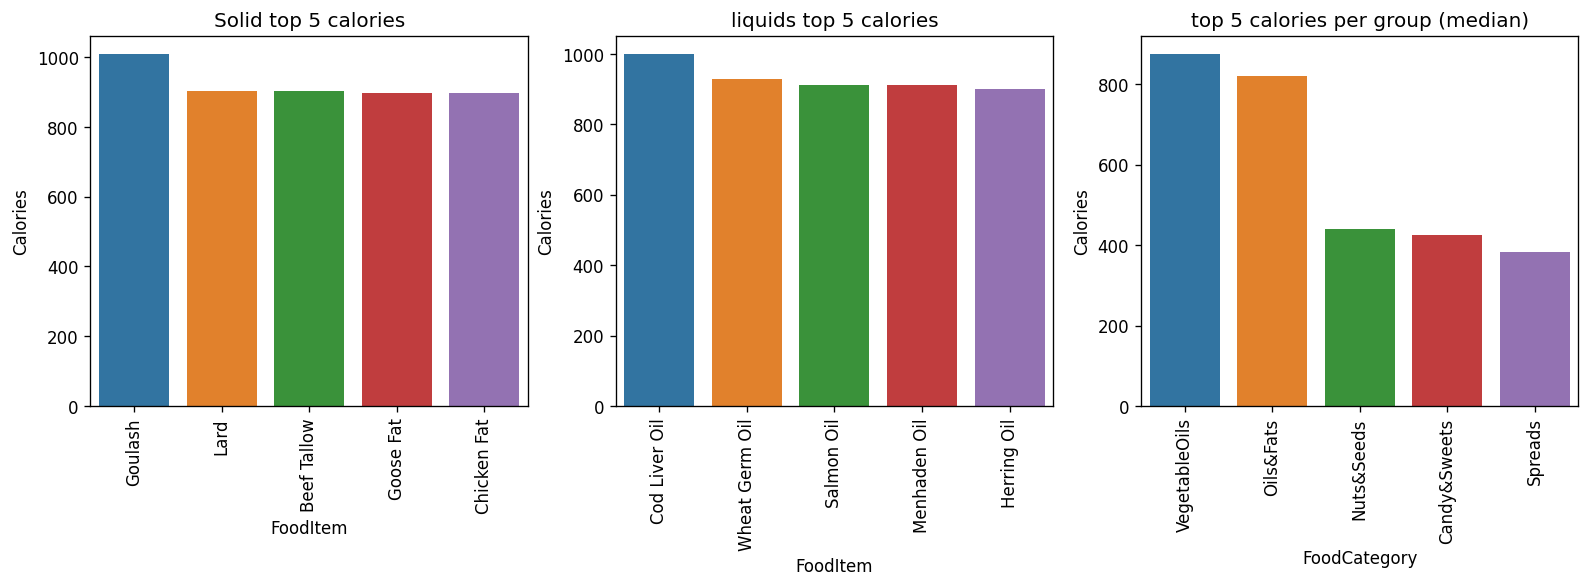

In [137]:
fig, axes = plt.subplots(1, 3, figsize=(16,4), dpi=120)
titles = ["Solid top 5 calories", "liquids top 5 calories", "top 5 calories per group (median)"]
data_frames = (solids_top5_calories, liquids_top5_calories, top5_category_median)
x_columns = ["FoodItem", "FoodItem", "FoodCategory"]

for i,(data, title) in enumerate(zip(data_frames, titles)):
    sns.barplot(data = data, x = x_columns[i], y = "Calories", ax = axes[i])
    axes[i].set(title = title)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation = 90)

plt.savefig("../assets/top_calories_food.png", facecolor = "white", bbox_inches = "tight")